# Práctica de resolución numérica de ecuacións non lineares

## Resolución de ecuacións usando cálculo simbólico

O SageMath permítemos resolver ecuacións usando comandos de cálculo simbólico:

In [5]:
solve(x^2 == x^4, x)

[x == -1, x == 1, x == 0]

Vemos que `solve` devolveu todas as solucións da ecuación $x^2 - x^4$ ou, equivalentemente, as raíces da función $f(x) = x^2-x^4$.

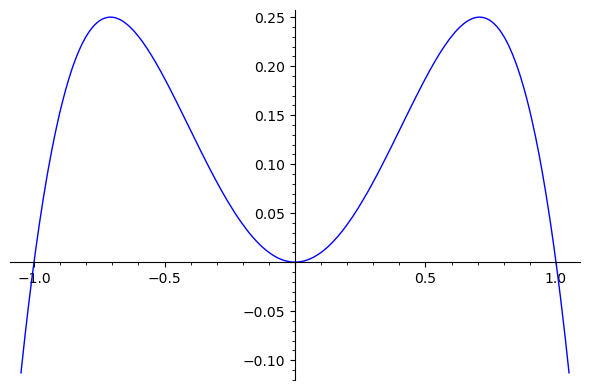

In [6]:
plot(x^2-x^4, -1.05, 1.05)

É incluso posible resolver ecuacións que dependan de parámetros. Aparte da $x$, o resto de variables e parámetros deben ser 
declarados somo símbolos.

In [7]:
var('b c')
s = solve(x^2 + b*x + c == 0, x)
show(s)

[x == -1/2*b - 1/2*sqrt(b^2 - 4*c), x == -1/2*b + 1/2*sqrt(b^2 - 4*c)]

A variable $s$ contén contén unha lista de ecuacións. Pra obter unha aproximación numérica dunha raíz, debemos:  
**a)** escoller unha das ecuacións, `s[0]`,  
**b)** tomar parte dereita da ecuación, `.rhs()`,  
**c)** substituir o valor dos parámetros, `(b=3, c=1)` e  
**d)** obter a aproximación numérica, `.n()`:

In [10]:
s[0].rhs()(b=3, c=1).n()

-2.61803398874989

Porén, `solve` non sempre pode retornar unha solución. No canto deso, devolve unha ecuación implícita:

In [8]:
solve(cos(x)==sin(x), x)

[sin(x) == cos(x)]

Observa que matemáticamente é doado ver que a solución é $\pi/4$ máis calquera media volta da circunferencia, $\pi/4+k\pi,\ k\in\mathbb{Z}$.

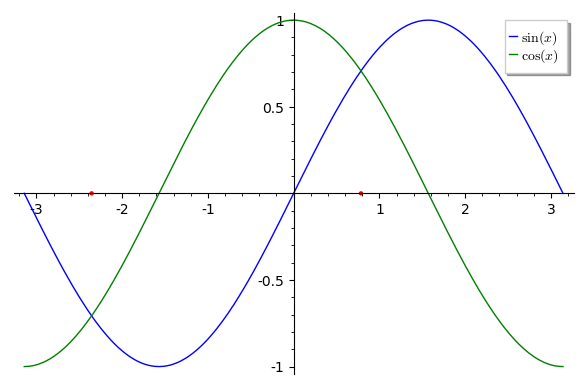

In [12]:
P = plot(sin(x), -pi, pi, legend_label=r'$\sin(x)$')
Q = plot(cos(x), -pi, pi, legend_label=r'$\cos(x)$', color='green')
R = point([(pi/4-pi,0), (pi/4,0)], color='red')
P+Q+R

## Resolución de ecuacións usando cálculo numérico

En Sagemath podemos chamar a `find_root` para tentar achar unha aproximación numérica da solución. Se hai varias, `find_root` só pode devolver a aproximación dunha delas e non é doado determinar cal delas está a aproximar.

In [13]:
find_root(cos(x)==sin(x), -pi, pi), (pi/4).n() #Está a aproximar pi/4

(0.7853981633974475, 0.785398163397448)

O comando `find_root` constrúe os iterantes dunha sucesión $x_1, x_2, \ldots, x_{n},x_{n+1},\ldots$ ata que algún criterio de parada se cumple. Na imaxe seguinte vemos o <span style="color:red">criterio do residuo</span> e o <span style="color:green">criterio de iterantes próximos</span>: 

<img src="criterios.png" width="60%" align="center">

<!-- 
f(x) = 1-x^2-x^4
plot(f, -.05, .8, ticks=[[0.2,0.5],None], tick_formatter=[["",""],None]) + \
line([(0.5,0),(0.5,f(0.5))], color='red', linestyle='--') + \
line([(0.495,0.01),(0.505,0.01)], color='red') + \
line([(0.495,f(0.5)),(0.505,f(0.5))], color='red') + \
text(r'$|f(x_{n+1})|< rtol?$', (0.62, 0.15), fontsize=14,color='red') + \
text(r'$x_{n+1}$', (0.5, -0.05), fontsize=14,color='black') + \
text(r'$x_{n}$',   (0.2, -0.05), fontsize=14,color='black') + \
line([(0.2,-0.1),(0.5,-0.1)], color='green', linestyle='--') + \
text(r'$|x_{n+1}-x_n|< xtol?$', (0.35, -0.17), fontsize=14,color='green') + \
line([(0.2,-0.11),(0.2,-0.09)], color='green') + \
line([(0.5,-0.11),(0.5,-0.09)], color='green') + \
text(r'$\alpha$', (0.77, -0.03), color='black', fontsize=14)
-->

Ao cambiar o intervalo de busca ou os [argumentos opcionais de `find_root`](https://doc.sagemath.org/html/en/reference/numerical/sage/numerical/optimize.html), a aproximación cambia.

A converxencia, en xeral, non está garantida. Por eso, convén coñecer de antemán se a raíz da función existe no intervalo estudado (aplicando o [teorema de Bolzano](https://fundmat.wordpress.com/2011/11/22/continuidade-de-funcions/)) e idealmente se é única no intervalo (aplicando o [teorema de Rolle](https://fundmat.wordpress.com/2011/12/11/os-teorema-de-rolle-e-do-valor-medio/)).

## O método de dicotomía

In [9]:
def dicotomia(f, a, b, xtol=1e-12, rtol=1e-14):
    """DICOTOMIA    Calculo de raices por dicotomia."""
    r = a
    k = 0
    v = []
    I = []
    # comprobacions previas
    if abs(f(a)).n() < rtol:
        r = a.n(); return r,k,v,I
    elif abs(f(b)).n() < rtol:
        r = b.n(); return r,k,v,I
    elif (f(a)*f(b)).n() > 0:
        raise RuntimeError('Extremos de igual signo.')
    # calculo iterativo
    while abs(b - a) > xtol:
        r = (a + b).n() / 2
        k = k + 1
        v.append(r)
        I.append((a,b))
        if abs(f(r)).n() < rtol:
            return r,k,v,I
        elif (f(a)*f(r)).n() < 0:
            b = r
        else:
            a = r
    return r,k,v,I

O uso de `.n()` é necesario para evitar as cadeas de símbolos sen despexar, típicas do cálculo simbólico aplicado a procesos iterativos, e que poden ralentizar o cálculo. Por exemplo:

In [17]:
sin(sin(sin(pi+1)+1)+1)

sin(sin(sin(pi + 1) + 1) + 1)

O código anterior pódese usar para aproximar unha raíz dunha función (expresión simbólica ou non) mediante o método de dicotomía:

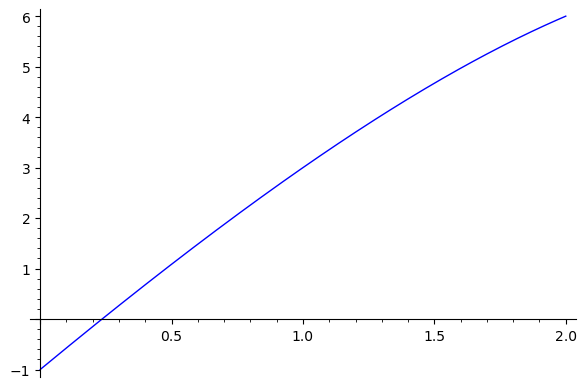

In [3]:
f(x) = 5*x-2^x
a = 0; b = 2
plot(f, a, b)   

In [5]:
dicotomia(f, a, b)[0:2]

(0.235455710070710, 41)

Os argumentos de saıda poden ser asignados ou non a variables de Sage:

In [20]:
r = dicotomia(f, a, b)[0] #só asigna a aproximación da raíz
r

0.235455710070710

In [21]:
_,k,_,_ = dicotomia(f, a, b) #só asigna o número de iteracións
k

41

A funcion `debuxa_dicotomia` permite debuxar os intervalos encaixados calculados por dicotomía.

In [22]:
def debuxa_dicotomia(f, a, b, v, I):
    """DEBUXA_DICOTOMIA    Visua
    liza intervalos de dicotomía."""
    p = plot(f, a, b) + point(zip(v,[0]*len(v)), color='green')
    h = (p.ymax() - p.ymin())/(1.5*len(v))
    show(sum(line([(a,h*i),    (b,h*i)],     color='green') + \
             line([(a,h*i-h/4),(a,h*i+h/4)], color='green') + \
             line([(b,h*i-h/4),(b,h*i+h/4)], color='green')   \
             for i, (a,b) in enumerate(I)) + p, xmin=a, xmax=b)

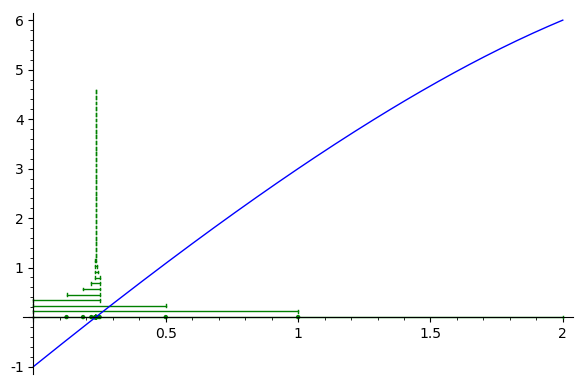

In [23]:
 _,_,v,I = dicotomia(f, a, b)
debuxa_dicotomia(f, a, b, v, I)

O método de dicotomía ten converxencia garantida para funcións continuas en intervalos onde presentan alternancia  de signo nos extremos. No caso anterior, podemos observar como a lonxitude de cada intervalo se divide á metade en cada iteración, ata que a lonxitude do intervalo na seguinte iteración sería menor que o valor de $xtol$ por defecto ($1e-12$):

In [24]:
for i in range(len(v)):
    print('Iterante ' + str(i+1) + ': ' + str(v[i]) + '; lonxitude do intervalo: ' + str((b-a)*.5^i))

Iterante 1: 1.00000000000000; lonxitude do intervalo: 2.00000000000000
Iterante 2: 0.500000000000000; lonxitude do intervalo: 1.00000000000000
Iterante 3: 0.250000000000000; lonxitude do intervalo: 0.500000000000000
Iterante 4: 0.125000000000000; lonxitude do intervalo: 0.250000000000000
Iterante 5: 0.187500000000000; lonxitude do intervalo: 0.125000000000000
Iterante 6: 0.218750000000000; lonxitude do intervalo: 0.0625000000000000
Iterante 7: 0.234375000000000; lonxitude do intervalo: 0.0312500000000000
Iterante 8: 0.242187500000000; lonxitude do intervalo: 0.0156250000000000
Iterante 9: 0.238281250000000; lonxitude do intervalo: 0.00781250000000000
Iterante 10: 0.236328125000000; lonxitude do intervalo: 0.00390625000000000
Iterante 11: 0.235351562500000; lonxitude do intervalo: 0.00195312500000000
Iterante 12: 0.235839843750000; lonxitude do intervalo: 0.000976562500000000
Iterante 13: 0.235595703125000; lonxitude do intervalo: 0.000488281250000000
Iterante 14: 0.235473632812500; lon

De feito, pódese coñecer con antelación o número máximo de iteracións, $k_{max}$:  
$\displaystyle (b-a)\left(\frac{1}{2}\right)^k\leq\textit{xtol};\qquad 2^{-k} \leq\frac{\textit{xtol}}{b-a};\qquad -k \leq\log_2\left(\frac{\textit{xtol}}{b-a}\right);\qquad k \geq\log_2\left(\frac{b-a}{\textit{xtol}}\right).$  
Por tanto,  
$\displaystyle k_{max} = \left\lceil\log_2\left(\frac{b-a}{\textit{xtol}}\right)\right\rceil.$

In [25]:
kmax = lambda a, b, xtol: ceil(log( (b-a)/xtol, 2))
kmax(a, b, 1e-12)

41

Esto permítenos revisar o uso correcto do método: se dicotomía itera máis de $k_{max}$ iteracións, algún dos argumentos proporcionados é incorrecto.

### Exercicio 1a:
Acha intervalos onde as raíces de $\displaystyle y = \frac{4}{3}x^4 - \frac{8}{15}x^3 - \frac{23}{25}x^2 + \frac{73}{375}x - \frac{37}{3750}$ sexan únicas. Aplica o comandos `solve`, `find_root` e o método de dicotomía para achalas.
<!-- f(x) = 4/3*(x-0.1)^4-(x-0.1)^2 -->

### Exercicio 1b:
Para a primeira raíz da función anterior, comproba que dicotomía non supera o número máximo de iteracións.

### Exercicio 2: 

Identifica un intervalo no que a función seguinte teña unha raíz:    
$h(x) =\begin{cases}
    -\sqrt{\pi-x}, & \text{ se }x < \pi, \\
    \sqrt{x-\pi}, & \text{ noutro caso}. \end{cases}$  
Intenta calculala con `solve`, `find_root` e `dicotomía`

## O método de Newton

In [41]:
def newton(f, df, x0, xtol=1e-12, rtol=1e-14, M=100, errorM=True):
    """NEWTON    Calculo de raices por Newton."""
    v = [x0.n()]
    for k in range(M):
        dfx = df(v[k]).n()
        if abs(dfx) < rtol:
            raise RuntimeError('Derivada nula.')
        r = (v[k] - f(v[k]) / dfx).n()
        v.append(r)
        # test de parada
        if abs(r-v[k]) < xtol or abs(f(r)).n() < rtol:
            return r, len(v), v
    if errorM: raise RuntimeError('Excedido numero maximo de iteracions.')
    return r, len(v), v

Vexamos como aproximar unha raíz co método anterior:

In [42]:
f(x) = 5*x-2^x
show(f)
newton(f, diff(f), 2)

x |--> -2^x + 5*x

(0.235455710071005,
 6,
 [2.00000000000000,
  -0.693709985177646,
  0.200275226314402,
  0.235373783249375,
  0.235455709617333,
  0.235455710071005])

 A funcion `debuxa_newton` permite debuxar a recta tanxente de cada iteración:

In [43]:
def debuxa_newton(f, a, b, v):
    """DEBUXA_NEWTON    Visualiza tanxentes do metodo de Newton."""
    show(plot(f, a, b) + point(zip(v,[0]*len(v)), color='green') + \
    sum(line([(v[i],0),(v[i],f(v[i]))], color='green', linestyle='--') for i in range(len(v))) + \
    sum(line([(v[i-1],f(v[i-1])), (v[i],0)], color='green') for i in range(1,len(v))), xmin=a, xmax=b)

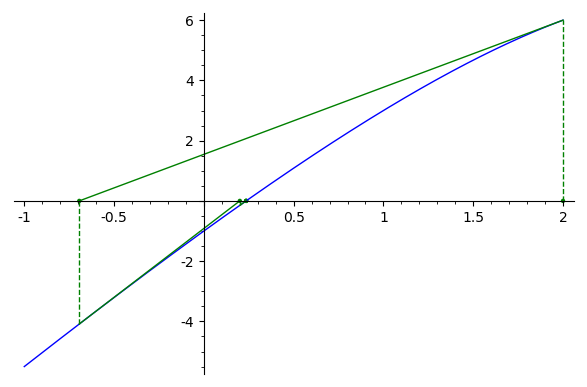

In [44]:
a = -1; b = 2
_,_,v = newton(f, diff(f), 2)
debuxa_newton(f, a, b, v)

O método de Newton pode chegar a converxencia cuadrática, o que implica que existen $K$, $C$ constantes postivas para as que:

$$|\alpha-x_{k+1}| \leq C|\alpha-x_k|^2,\ k\geq K, $$

sendo $\alpha$ a  raíz exacta. Para comprobar na práctica que a converxencia é cuadrática, debúxanse as constantes $C_k$ para comprobar se están limitadas segundo $k$ medra:

$$ C_k = \frac{|\alpha-x_{k+1}|}{|\alpha-x_k|^2}.$$

O cálculo faise sempre que o denominador non sexa excesivamente pequeno.

In [1]:
def coef_newton(f, a, b, v):
    """COEF_NEWTON    Calcula os coeficientes de converxencia de Newton."""
    alpha = find_root(f, a, b, xtol=9.e-16, rtol=9.e-16) #aproximamos "ao máximo" a raíz
    pts = []
    for k in range(len(v)-1):
        if (alpha - v[k])^2 > RDF.epsilon():
            pts.append( (k, abs(alpha - v[k+1]) / (alpha - v[k])^2 ) )
    return line(pts, marker = '.', title='$C_k$ obtidos')

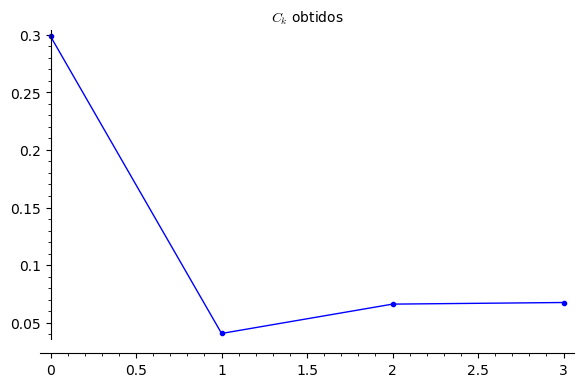

In [46]:
coef_newton(f, a, b, v)

No caso anterior vese que, segundo $k$ medra, as constantes $C_k$ tenden a estar limitadas polo valor $C\approx 0.1$. logo a converxencia é cuadrática.

**Atención:** Como en xeral non coñecemos $\alpha$, pedímoslle a `find_root` que nos sé unha boa aproximación. Porén, se hai varias raíces, nada nos garante que converxa á mesma que o fai `newton`.

### Exercicio 3
Acha unha aproximación das tres raíces de $\displaystyle y = \frac{4}{3}x^4 - \frac{8}{15}x^3 - \frac{23}{25}x^2 + \frac{73}{375}x - \frac{37}{3750}$ mediante `newton`e indica en cantas iteracións se conseguiu, pinta as tanxentes e comproba se a converxencia é cuadrática.
<!-- f(x) = 4/3*(x-0.1)^4-(x-0.1)^2 -->

### Exercicio 4: 
Aplica o método de Newton para intentar calcular a raíz de  

$h(x) =\begin{cases}
    -\sqrt{\pi-x}, & \text{ se }x < \pi, \\
    \sqrt{x-\pi}, & \text{ noutro caso}. \end{cases}$  
Usa o argumento `errorM=False` para observar os iterantes calculados.

### Exercicio 5 
Modifica o código de `newton` e crea a nova función `secante`, que implemente o método da secante como se indica nos apuntes da materia. Observa que xa non é necesario pasaea derivada, pero si pasar os dous primeiros iterantes. Modifica o código de `coef_newton` e crea a nova función `coef_secante` que comprobe se a orde de converxencia do método da secante é o número áureo, $\Phi = \frac{1+\sqrt{5}}{2}$.